In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [48]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [49]:
print("Number of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))
print("Shape of an image:", X_train[0].shape)

Number of training samples: 60000
Number of testing samples: 10000
Shape of an image: (28, 28)


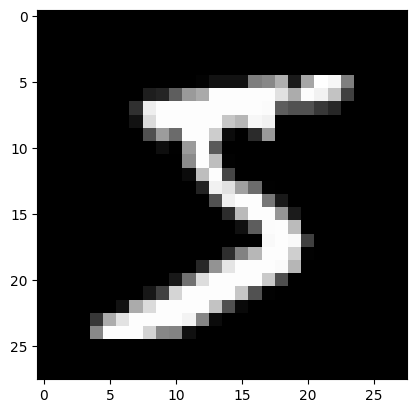

In [50]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [51]:
X_train = X_train / 255
X_test = X_test / 255

In [52]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [53]:
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') 
])

c:\Users\ryanj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
cnn.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8593 - loss: 0.4406 - val_accuracy: 0.9821 - val_loss: 0.0521
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9734 - loss: 0.0917 - val_accuracy: 0.9882 - val_loss: 0.0315
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9827 - loss: 0.0588 - val_accuracy: 0.9905 - val_loss: 0.0283
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.9857 - loss: 0.0465 - val_accuracy: 0.9883 - val_loss: 0.0310
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9878 - loss: 0.0377 - val_accuracy: 0.9913 - val_loss: 0.0266


In [56]:
test_loss, test_acc = cnn.evaluate(X_test, Y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.9913 - loss: 0.0266
Test accuracy: 0.9913


In [57]:
predictions = cnn.predict(X_test) 

predicted_labels = np.argmax(predictions, axis=1) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


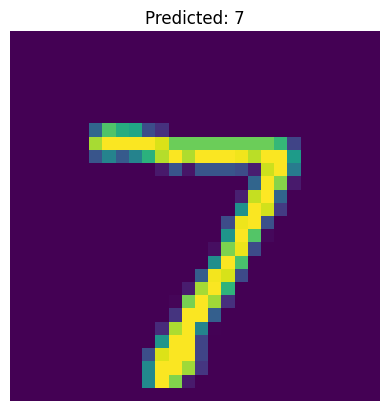

In [ ]:
index = 0  
plt.imshow(X_test[index]) 
plt.title(f"Predicted: {predicted_labels[index]}") 
plt.axis('off') 
plt.show() 